<a href="https://colab.research.google.com/github/ismachy/Introduction-to-ML/blob/main/HW4_Q2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:

from sklearn.model_selection import train_test_split
np.random.seed(0)
# split 80% as training set and 20% as testing set
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

df_train.shape

(436, 13)

In [8]:
df_test.shape

(109, 13)

In [9]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [10]:
df_Newtrain.shape

(436, 12)

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0,0.596970
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.527273
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.404242
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,0.363636
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.109091
344,0.140212,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.181818
1,0.495962,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.909091
257,0.446533,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.236364
184,0.081036,0.4,0.333333,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.290909
275,0.152882,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.222424


In [12]:
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtest.head(20)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.248485
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.531987
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.329966
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.262626
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.246465
231,0.191398,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.276094
25,0.350538,0.666667,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,0.646465
169,0.350538,0.666667,0.5,0.333333,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.329966
494,0.369176,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.087542
120,0.350538,0.333333,0.0,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0,0.397306


In [13]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [14]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,0.432609,0.4,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.333333,0.0
41,0.314954,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0
91,0.342105,0.2,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.666667,1.0
118,0.319131,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0
472,0.124896,0.6,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.000000,0.0


In [15]:
y_Newtrain.head()

22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
Name: price, dtype: float64

In [16]:
y = y_Newtrain.values
print('y = ', y[: 5])

y =  [0.5969697  0.52727273 0.40424242 0.36363636 0.10909091]


In [17]:
# getting the input values from each column and putting them as a separate variable for training set

X1 = df_Newtrain.values[:, 0]
X2 = df_Newtrain.values[:, 1]
X3 = df_Newtrain.values[:, 2]
X4 = df_Newtrain.values[:, 3]
X5 = df_Newtrain.values[:, 4]
X6 = df_Newtrain.values[:, 5]
X7 = df_Newtrain.values[:, 6]
X8 = df_Newtrain.values[:, 7]
X9 = df_Newtrain.values[:, 8]
X10 = df_Newtrain.values[:, 9]
X11 = df_Newtrain.values[:, 10]

print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('X4 = ', X4[: 5])
print('X5 = ', X5[: 5])
print('X6 = ', X6[: 5])
print('X7 = ', X7[: 5])
print('X8 = ', X8[: 5])
print('X9 = ', X9[: 5])
print('X10 = ', X10[: 5])
print('X11 = ', X11[: 5])

X1 =  [0.4326093  0.31495405 0.34210526 0.31913116 0.12489557]
X2 =  [0.4 0.4 0.2 0.4 0.6]
X3 =  [0.         0.33333333 0.         0.         0.        ]
X4 =  [0.         1.         0.         0.         0.33333333]
X5 =  [1. 1. 1. 1. 1.]
X6 =  [1. 0. 1. 0. 0.]
X7 =  [1. 0. 1. 1. 0.]
X8 =  [0. 0. 0. 0. 0.]
X9 =  [1. 1. 0. 1. 0.]
X10 =  [0.33333333 0.         0.66666667 0.         1.        ]
X11 =  [0. 1. 1. 1. 0.]


In [18]:
m = len(X_Newtrain)
X_0 = np.ones((m, 1))
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [19]:
# Converting 1D arrays of training X's to 2D arrays

X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)

print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])
print('X_4 = ', X_4[: 5])
print('X_5 = ', X_5[: 5])
print('X_6 = ', X_6[: 5])
print('X_7 = ', X_7[: 5])
print('X_8 = ', X_8[: 5])
print('X_9 = ', X_9[: 5])
print('X_10 = ', X_10[: 5])
print('X_11 = ', X_11[: 5])

X_1 =  [[0.4326093 ]
 [0.31495405]
 [0.34210526]
 [0.31913116]
 [0.12489557]]
X_2 =  [[0.4]
 [0.4]
 [0.2]
 [0.4]
 [0.6]]
X_3 =  [[0.        ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]]
X_4 =  [[0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.33333333]]
X_5 =  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
X_6 =  [[1.]
 [0.]
 [1.]
 [0.]
 [0.]]
X_7 =  [[1.]
 [0.]
 [1.]
 [1.]
 [0.]]
X_8 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_9 =  [[1.]
 [1.]
 [0.]
 [1.]
 [0.]]
X_10 =  [[0.33333333]
 [0.        ]
 [0.66666667]
 [0.        ]
 [1.        ]]
X_11 =  [[0.]
 [1.]
 [1.]
 [1.]
 [0.]]


In [20]:
# Stacking X_0 through X_11 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X [: 5]

array([[1.        , 0.4326093 , 0.4       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.31495405, 0.4       , 0.33333333, 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.34210526, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.66666667, 1.        ],
       [1.        , 0.31913116, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        ],
       [1.        , 0.12489557, 0.6       , 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [21]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [22]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,0.088172,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0
54,0.311828,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
171,0.617849,0.333333,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,1.0
244,0.263082,0.333333,0.0,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,1.0
268,0.236559,0.666667,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


In [23]:
y_Newtest.head()

265    0.248485
54     0.531987
171    0.329966
244    0.262626
268    0.246465
Name: price, dtype: float64

In [24]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 5])

y_test =  [0.24848485 0.53198653 0.32996633 0.26262626 0.24646465]


In [25]:
# getting the input values from each column and putting them as a separate variable for validation set

X1_test = df_Newtest.values[:, 0]
X2_test = df_Newtest.values[:, 1]
X3_test = df_Newtest.values[:, 2]
X4_test = df_Newtest.values[:, 3]
X5_test = df_Newtest.values[:, 4]
X6_test = df_Newtest.values[:, 5]
X7_test = df_Newtest.values[:, 6]
X8_test = df_Newtest.values[:, 7]
X9_test = df_Newtest.values[:, 8]
X10_test = df_Newtest.values[:, 9]
X11_test = df_Newtest.values[:, 10]

In [26]:
m_test = len(X_Newtest)
X_0_test = np.ones((m_test, 1))

In [27]:
# Converting 1D arrays of validation X's to 2D arrays

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

In [28]:
# Stacking X_0_test through X_11_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
X_test [: 5]

array([[1.        , 0.08817204, 0.33333333, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.31182796, 0.33333333, 0.5       , 0.33333333,
        1.        , 1.        , 0.        , 0.        , 1.        ,
        0.33333333, 0.        ],
       [1.        , 0.61784946, 0.33333333, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333, 1.        ],
       [1.        , 0.26308244, 0.33333333, 0.        , 0.33333333,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 0.23655914, 0.66666667, 0.        , 0.33333333,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

In [29]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=1e3)
svr_lin.fit(X, y)
y_pred_lin = svr_lin.predict(X_test)

In [30]:
y_pred_lin[0:9]

array([0.1775899 , 0.50148198, 0.32757082, 0.30337668, 0.25598343,
       0.17643201, 0.6167624 , 0.40122357, 0.17036538])

In [31]:
errors = np.subtract(y_pred_lin, y_test)
sqrErrors = np.square(errors)
loss = 1 / (2 * m_test) * np.sum(sqrErrors)
loss

0.0062063289402495905

In [32]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X, y)
y_pred_rbf = svr_rbf.predict(X_test)

In [33]:
errors = np.subtract(y_pred_rbf, y_test)
sqrErrors = np.square(errors)
loss = 1 / (2 * m_test) * np.sum(sqrErrors)
loss

0.013733033485657783

In [34]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(X, y)
y_pred_poly = svr_poly.predict(X_test)

In [35]:
errors = np.subtract(y_pred_poly, y_test)
sqrErrors = np.square(errors)
loss = 1 / (2 * m_test) * np.sum(sqrErrors)
loss

0.00808045482925889

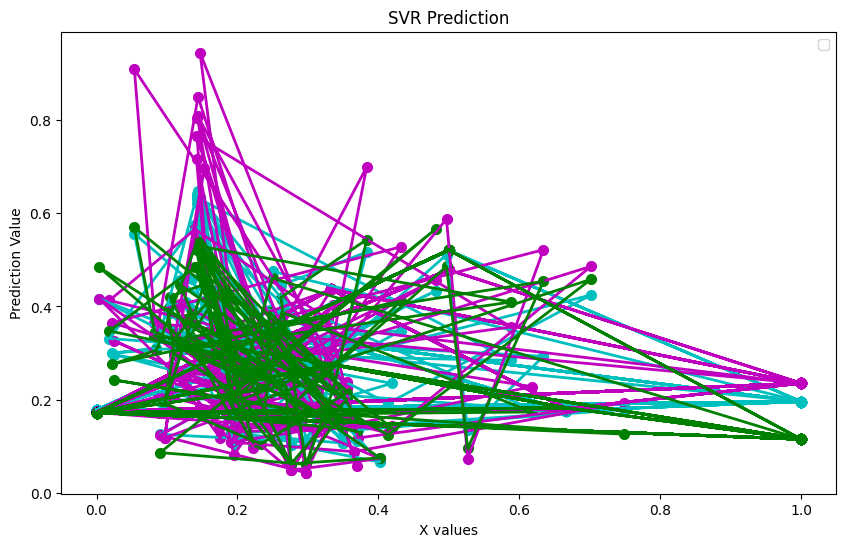

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

plt.figure(figsize=(10, 6))

# Interpolate the prediction arrays to match the length of X_test
x_pred = np.linspace(X_test.min(), X_test.max(), len(y_pred_lin))
f_lin = interp1d(x_pred, y_pred_lin, kind='cubic')
f_rbf = interp1d(x_pred, y_pred_rbf, kind='cubic')
f_poly = interp1d(x_pred, y_pred_poly, kind='cubic')

# Use the interpolated values for plotting
y_pred_lin_smoothed = f_lin(X_test)
y_pred_rbf_smoothed = f_rbf(X_test)
y_pred_poly_smoothed = f_poly(X_test)


# Plot the smoothed lines
plt.scatter(X_test, y_pred_lin_smoothed, color='c', lw=2)
plt.scatter(X_test, y_pred_rbf_smoothed, color='m', lw=2)
plt.scatter(X_test, y_pred_poly_smoothed, color='g', lw=2)

# Plot the smoothed lines
plt.plot(X_test, y_pred_lin_smoothed, color='c', lw=2)
plt.plot(X_test, y_pred_rbf_smoothed, color='m', lw=2)
plt.plot(X_test, y_pred_poly_smoothed, color='g', lw=2)

plt.xlabel('X values')
plt.ylabel('Prediction Value')
plt.title('SVR Prediction')
plt.legend()
plt.show()
